In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
from tqdm import tqdm

In [4]:
# Here file is converted to np ndarray
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [5]:
file="C:\\Users\\munir\\Desktop\\cvpr\\cifar-10-batches-py\\"

In [4]:
dir=['fold1', 'fold2', 'fold3', 'fold4', 'fold5']


In [5]:
dataset=[0,1,2,3,4]


In [6]:
# unpickle the zip file
for i,dirc in zip(dataset,dir):
    dataset[i]=unpickle(file + dirc)

In [7]:
# datasets are divided into batches
fold1=dataset[0]
fold2=dataset[1]
fold3=dataset[2]
fold4=dataset[3]
fold5=dataset[4]


In [19]:
# l-> label, m->image... showed 100000 image for onefold

l=fold1[b'data']
m=l.reshape(10000,3,32,32).transpose(0,2,3,1).astype("uint8")
print(m.shape)

(10000, 32, 32, 3)


In [27]:
n=fold1[b'labels']
print(n[1])

9


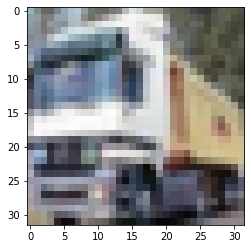

In [29]:
# ploting an image from fold1
plt.imshow(m[1])

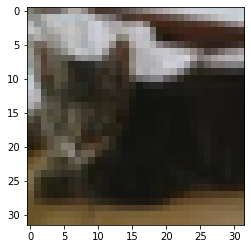

In [55]:
plt.imshow(m[9])

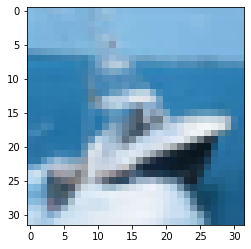

In [56]:
plt.imshow(m[8])

In [33]:
print(m.shape)

(10000, 32, 32, 3)


In [34]:
fold2.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [35]:
n=fold2[b'labels']
print(n[1])

6


In [37]:
# images are reorganized and reshape
k=fold2[b'data']
o=k.reshape(10000,3,32,32).transpose(0,2,3,1).astype("uint8")
print(o.shape)

(10000, 32, 32, 3)


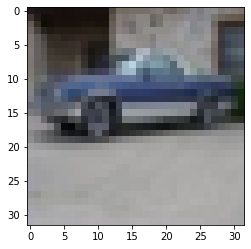

In [38]:
plt.imshow(o[0])

In [40]:
print(m.shape[0])

10000


# FOLD 1

In [212]:
kset=dict() # K values (1 to 20)
selecteddataset=fold1
selectedlist=list()
totallist=list()
datalist=[fold2,fold3,fold4,fold5]
data=selecteddataset[b'data']
reshapedata=data.reshape(10000,3,32,32).transpose(0,2,3,1).astype("uint8")
datalabel=selecteddataset[b'labels']
for liquid in range(reshapedata.shape[0]): # total range  10000
    selectedlist.append((reshapedata[liquid],datalabel[liquid])) 
for heal in datalist: #merging 4 folds
    left=heal[b'data'] #both label and images are stored
    reshapedata1=left.reshape(10000,3,32,32).transpose(0,2,3,1).astype("uint8")
    datalabel1=heal[b'labels'] #only labels are stored
    for liquid in range(reshapedata1.shape[0]): #now adding images and labels of 4 folds
        totallist.append((reshapedata1[liquid],datalabel1[liquid]))    
for rr in tqdm(range(3)): 
    test=random.randint(0,9999) #picking random int  
    for k in range(20): #for k = 1 to 20 
        totalimg=list()
        for train in range(len(totallist)):
            test_img=selectedlist[test][0]
            train_image=totallist[train][0]
            dist=test_img-train_image  # using Manhatten/ L1
            modulas=np.absolute(dist) #taking absolute value 
            totalsum=np.sum(modulas)
            totalimg.append((totalsum,totallist[train][1]))
        sortedlist=sorted(totalimg,key=lambda x:x[0]) #sorting the distance of totalimage list
        prediction=list()
        for ab in range(k+1): # for all k values creating prediction list and appending for each value of k
            prediction.append(sortedlist[ab][1])
        for imt in range(len(prediction)):
            if selectedlist[test][1]==prediction[imt]:
                kset[k+1]=kset.get(k+1, 0)+1
        
print(kset.items())
            
        
            

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:30<00:00, 10.27s/it]

dict_items([(14, 6), (15, 6), (16, 7), (17, 7), (18, 8), (19, 8), (20, 9), (3, 1), (4, 1), (5, 2), (6, 3), (7, 3), (8, 3), (9, 4), (10, 4), (11, 4), (12, 4), (13, 5)])


In [221]:
prediction

[2, 6, 8, 6, 2, 6, 8, 3, 0, 2, 6, 2, 3, 4, 5, 7, 8, 6, 2, 6]

# FOLD 2

In [208]:
totallist=list()
selecteddataset=fold2
selectedlist=list()
datalist=[fold1,fold3,fold4,fold5]
data=selecteddataset[b'data']
reshapedata=data.reshape(10000,3,32,32).transpose(0,2,3,1).astype("uint8")
datalabel=selecteddataset[b'labels']
for liquid in range(reshapedata.shape[0]):
    selectedlist.append((reshapedata[liquid],datalabel[liquid]))
for heal in datalist:
    left=heal[b'data']
    reshapedata1=left.reshape(10000,3,32,32).transpose(0,2,3,1).astype("uint8")
    datalabel1=heal[b'labels']
    for liquid in range(reshapedata1.shape[0]):
        totallist.append((reshapedata1[liquid],datalabel1[liquid]))
        

kset1=dict()
totalset=dict()
for rr in tqdm(range(3)):
    test=random.randint(0,9999)
    #test=rr
    for k in range(20):
        totalimg=list()
        for train in range(len(totallist)):
            test_img=selectedlist[test][0]
            train_image=totallist[train][0]
            dist=test_img-train_image
            modulas=np.absolute(dist)
            totalsum=np.sum(modulas)
            totalimg.append((totalsum,totallist[train][1]))
        sortedlist=sorted(totalimg,key=lambda x:x[0])
        prediction=list()
        for ab in range(k+1):
            prediction.append(sortedlist[ab][1])
        for imt in range(len(prediction)):
            if selectedlist[test][1]==prediction[imt]:
                kset1[k+1]=kset1.get(k+1, 0)+1
        
print(kset1.items())

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:31<00:00, 10.36s/it]

dict_items([(6, 6), (7, 7), (8, 7), (9, 7), (10, 8), (11, 10), (12, 11), (13, 12), (14, 13), (15, 14), (16, 15), (17, 16), (18, 17), (19, 18), (20, 18), (3, 2), (4, 3), (5, 4)])


# FOLD 3

In [196]:
totallist=list()
selecteddataset=fold3
selectedlist=list()
datalist=[fold1,fold2,fold4,fold5]
data=selecteddataset[b'data']
reshapedata=data.reshape(10000,3,32,32).transpose(0,2,3,1).astype("uint8")
datalabel=selecteddataset[b'labels']
for liquid in range(reshapedata.shape[0]):
    selectedlist.append((reshapedata[liquid],datalabel[liquid]))
for heal in datalist:
    left=heal[b'data']
    reshapedata1=left.reshape(10000,3,32,32).transpose(0,2,3,1).astype("uint8")
    datalabel1=heal[b'labels']
    for liquid in range(reshapedata1.shape[0]):
        totallist.append((reshapedata1[liquid],datalabel1[liquid]))
        
#for test in range(len(selectedlist)):
kset2=dict()
totalset=dict()
for rr in tqdm(range(3)):
    test=random.randint(0,9999)
    #test=rr
    for k in range(20):
        totalimg=list()
        for train in range(len(totallist)):
            test_img=selectedlist[test][0]
            train_image=totallist[train][0]
            dist=test_img-train_image
            modulas=np.absolute(dist)
            totalsum=np.sum(modulas)
            totalimg.append((totalsum,totallist[train][1]))
        sortedlist=sorted(totalimg,key=lambda x:x[0])
        prediction=list()
        for ab in range(k+1):
            prediction.append(sortedlist[ab][1])
        for imt in range(len(prediction)):
            if selectedlist[test][1]==prediction[imt]:
                kset2[k+1]=kset2.get(k+1, 0)+1
        
print(kset2.items())

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:31<00:00, 10.37s/it]

dict_items([(5, 4), (6, 5), (7, 7), (8, 9), (9, 11), (10, 12), (11, 14), (12, 16), (13, 17), (14, 18), (15, 18), (16, 19), (17, 19), (18, 20), (19, 20), (20, 20), (4, 3), (1, 1), (2, 1), (3, 1)])


# FOLD 4

In [204]:
totallist=list()
selecteddataset=fold4
selectedlist=list()
datalist=[datalist=[fold1,fold2,fold3,fold5]
data=selecteddataset[b'data']
reshapedata=data.reshape(10000,3,32,32).transpose(0,2,3,1).astype("uint8")
datalabel=selecteddataset[b'labels']
for liquid in range(reshapedata.shape[0]):
    selectedlist.append((reshapedata[liquid],datalabel[liquid]))
for heal in datalist:
    left=heal[b'data']
    reshapedata1=left.reshape(10000,3,32,32).transpose(0,2,3,1).astype("uint8")
    datalabel1=heal[b'labels']
    for liquid in range(reshapedata1.shape[0]):
        totallist.append((reshapedata1[liquid],datalabel1[liquid]))
        
#for test in range(len(selectedlist)):
kset3=dict()
totalset=dict()
for rr in tqdm(range(3)):
    test=random.randint(0,9999)
    #test=rr
    for k in range(20):
        totalimg=list()
        for train in range(len(totallist)):
            test_img=selectedlist[test][0]
            train_image=totallist[train][0]
            dist=test_img-train_image
            modulas=np.absolute(dist)
            totalsum=np.sum(modulas)
            totalimg.append((totalsum,totallist[train][1]))
        sortedlist=sorted(totalimg,key=lambda x:x[0])
        prediction=list()
        for ab in range(k+1):
            prediction.append(sortedlist[ab][1])
        for imt in range(len(prediction)):
            if selectedlist[test][1]==prediction[imt]:
                kset3[k+1]=kset3.get(k+1, 0)+1
        
print(kset3.items())

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:30<00:00, 10.31s/it]

dict_items([(2, 1), (3, 1), (4, 2), (5, 2), (6, 3), (7, 3), (8, 3), (9, 3), (10, 4), (11, 5), (12, 5), (13, 5), (14, 5), (15, 5), (16, 6), (17, 6), (18, 7), (19, 8), (20, 8)])


# FOLD 5

In [188]:
totallist=list()
selecteddataset=fold5
selectedlist=list()
datalist=[datalist=[fold1,fold2,fold4,fold5]
data=selecteddataset[b'data']
reshapedata=data.reshape(10000,3,32,32).transpose(0,2,3,1).astype("uint8")
datalabel=selecteddataset[b'labels']
for liquid in range(reshapedata.shape[0]):
    selectedlist.append((reshapedata[liquid],datalabel[liquid]))
for heal in datalist:
    left=heal[b'data']
    reshapedata1=left.reshape(10000,3,32,32).transpose(0,2,3,1).astype("uint8")
    datalabel1=heal[b'labels']
    for liquid in range(reshapedata1.shape[0]):
        totallist.append((reshapedata1[liquid],datalabel1[liquid]))
        
#for test in range(len(selectedlist)):
kset4=dict()
totalset=dict()
for rr in tqdm(range(3)):
    test=random.randint(0,9999)
    #test=rr
    for k in range(20):
        totalimg=list()
        for train in range(len(totallist)):
            test_img=selectedlist[test][0]
            train_image=totallist[train][0]
            dist=test_img-train_image
            modulas=np.absolute(dist)
            totalsum=np.sum(modulas)
            totalimg.append((totalsum,totallist[train][1]))
        sortedlist=sorted(totalimg,key=lambda x:x[0])
        prediction=list()
        for ab in range(k+1):
            prediction.append(sortedlist[ab][1])
        for imt in range(len(prediction)):
            if selectedlist[test][1]==prediction[imt]:
                kset4[k+1]=kset4.get(k+1, 0)+1
        
print(kset4.items())

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:31<00:00, 10.38s/it]

dict_items([(1, 1), (2, 2), (3, 4), (4, 6), (5, 7), (6, 8), (7, 9), (8, 11), (9, 12), (10, 13), (11, 14), (12, 15), (13, 16), (14, 18), (15, 19), (16, 20), (17, 21), (18, 22), (19, 23), (20, 24)])


In [217]:
dictionary=dict()
for l in range(20):
    dictionary[l+1]=(kset.get(l+1,0)+kset1.get(l+1,0)+kset2.get(l+1,0)+kset3.get(l+1,0)+kset4.get(l+1,0)) # adding k value of all folds
accuracy=list()
for h in range(20):
    accuracy.append(float(format(dictionary[h+1]*100/((h+1)*3*5),'.2f'))) # calculting accuracy
print(accuracy)

[13.33, 13.33, 20.0, 25.0, 25.33, 27.78, 27.62, 27.5, 27.41, 27.33, 28.48, 28.33, 28.21, 28.57, 27.56, 27.92, 27.06, 27.41, 27.02, 26.33]


Text(0, 0.5, 'Accuracy')

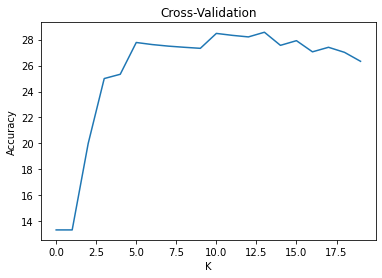

In [218]:
plt.plot(accuracy)
plt.title("Cross-Validation")
plt.xlabel("K")
plt.ylabel("Accuracy")